plot max temperature evolution AND beam profile AND SEM+Thermionic emission 

2024.03.27, mariusz.sapinski@psi.ch




In [152]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

#matplotlib notebook


In [153]:
# read simulation configuration file name
with open("Last.txt") as f:
    cfname=f.readlines()[1]
confname=cfname[26:]    
print(confname)    

PSI_pChann_MBPTWS.txt 



In [154]:
# for WIRESCANNER option output only
#dft = pd.read_csv("MaxTempVSTime.txt", skiprows=3, delim_whitespace=True, names=["em","time","pos","maxT"])
#dfc = pd.read_csv("IntensityVSTime.txt", skiprows=3, delim_whitespace=True, names=["time","pos","curr"])

# new format
#df = pd.read_csv("PSI_pChann_MBPTWS.txt", skiprows=4)
df = pd.read_csv("Last.txt", skiprows=9)

print(df.columns)


Index(['#   Time [us]', ' Position [mm]', ' Npart', ' MaxTemp [K]',
       ' SEMcurr [uA]', ' THcurr [uA] '],
      dtype='object')


In [155]:
# rename columns
df.rename({"#   Time [us]":"time"," Position [mm]":"pos"," Npart":"npart"," MaxTemp [K]":"maxt"," SEMcurr [uA]":"isem"," THcurr [uA] ":"ithc"}, axis='columns',inplace=True)

In [156]:
#print(dfc)
print(df)

               time       pos     npart     maxt          isem          ithc
0      5.333333e+01  -40.0000  0.846123  300.000  2.460510e-18  3.541300e-72
1      1.066667e+02  -39.9968  0.848945  300.000  2.468716e-18  3.541300e-72
2      1.600000e+02  -39.9936  0.851776  300.000  2.476950e-18  3.541300e-72
3      2.133333e+02  -39.9904  0.854616  300.000  2.485209e-18  3.541300e-72
4      2.666667e+02  -39.9872  0.857466  300.000  2.493496e-18  3.541300e-72
...             ...       ...       ...      ...           ...           ...
49995  2.666453e+06  119.9840  0.000000  790.974  1.275593e-90  1.287724e-20
49996  2.666507e+06  119.9872  0.000000  790.967  1.262916e-90  1.286936e-20
49997  2.666560e+06  119.9904  0.000000  790.961  1.250364e-90  1.286149e-20
49998  2.666613e+06  119.9936  0.000000  790.954  1.237936e-90  1.285362e-20
49999  2.666667e+06  119.9968  0.000000  790.948  1.225632e-90  1.284576e-20

[50000 rows x 6 columns]


In [157]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))


[9.24291143e+08 8.62138012e-11 6.20000387e+00]
2.666613333331 2666666.666664 53.333333


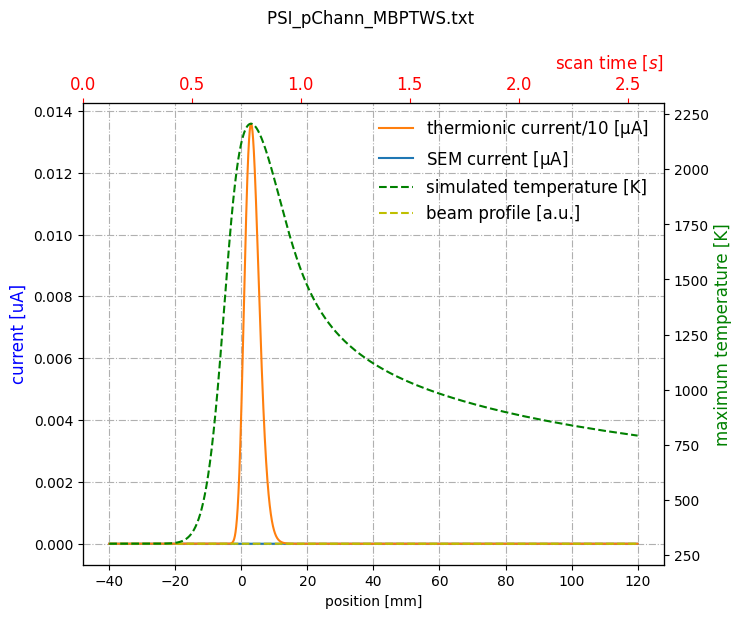

In [165]:
fig, ax = plt.subplots(1, figsize=(7.5,6))

# factor 2 is for 2 wires
hsimse, = ax.plot([x*1 for x in df["pos"]],[2*x for x in df["isem"]],label=r"SEM current [$\rm \mu A$]")
hsimit, = ax.plot([x*1 for x in df["pos"]],[2*x/1000 for x in df["ithc"]],label=r"thermionic current/10 [$\rm \mu A$]")
#hsimit, = ax.plot([x*1 for x in df["pos"]],[x for x in df["ithc"]],label=r"thermionic current [$\rm \mu A$]")
scale=1.1*df["isem"].max()/df["npart"].max()
#scale=0.9*df["ithc"].max()/df["npart"].max()

hbeamp, = ax.plot([x*1 for x in df["pos"]],[scale*x for x in df["npart"]],"y--",label="beam profile [a.u.]")
ax.set_title(confname) 
#ax.set_ylim(0,0.6)
ax.grid(True, linestyle='-.')

# fit gauss to make sure it corresponds to input
popt, pcov = curve_fit(gauss_function, df['pos'], df["npart"], p0 = [df['npart'].max(), 0.0, 1.0])
print(popt)
#ax.plot(x, gauss_function(x, *popt), label='fit')

axtemp = ax.twinx()
#axtemp.set_ylim(0,2800)
hsimt, = axtemp.plot([x*1 for x in df["pos"]],df["maxt"],'g--',label="simulated temperature [K]")
axtemp.set_ylabel("maximum temperature [K]", fontsize=12, color='g')

ax.set_xlabel("position [mm]")
ax.set_ylabel("current [uA]", fontsize=12, color='b')

axtime = ax.twiny()
tlimend=(df["time"].iloc[-1]-df["time"].iloc[0])/1e6 # ? 60 mm/s
print(tlimend,df["time"].iloc[-1],df["time"].iloc[0])
axtime.set_xlim(0,tlimend)
axtime.set_xlabel(r"scan time [$s$]",loc="right",fontsize=12, color='red', labelpad=5)
axtime.tick_params(axis='x', colors='red', labelsize=12)    #setting up X-axis tick color to red
#ax.tick_params(axis='both', which='major', labelsize=10)

#ax.set_xlim(-2,3)


ax.legend(handles=[hsimit,hsimse,hsimt,hbeamp], fontsize=12, frameon=False)
#ax.legend(handles=[hsimit,hsimt,hbeamp], fontsize=12, frameon=False)
#ax.grid()

plt.savefig('all.png')

In [118]:
dw=30e-6
vw=1

print("dt [us] = ",df["time"].iloc[2]-df["time"].iloc[1])
print("max wirestep [us] = ",dw/vw*1e6)

dt [us] =  0.46666699999999994
max wirestep [us] =  30.0


In [119]:
# max SEM current [uA] 
print(max(df['isem']))

5.31581993356225e-08


In [120]:
# compare numbers of protons 
Np=2e13
frev=43478.26

print(Np*frev*dw/vw/1e13)

print(df["npart"].sum()/1e13)

print("missing: ",df["npart"].sum()/(Np*frev*dw/vw))

2.6086956
2.589422085372693
missing:  0.992611819245102
